In [1]:
import pandas as pd
import numpy as np
import pickle
from APIcall_v2 import main_api_call
from data_extraction import main_extract_transform_memory


In [2]:
start_date, end_date, df_memory = main_api_call()

Garmin Connect API - Activity Downloader
start date:  2025-03-23 start_date type:  <class 'datetime.date'>
end date:  2025-05-12 end_date type:  <class 'datetime.date'>
Login successful!
Activity data for 'Cardio_12-05-2025_19100564024.csv' loaded into DataFrame.
Activity data for 'County Cork Running_11-05-2025_19088549670.csv' loaded into DataFrame.
Activity data for 'Treadmill Running_09-05-2025_19071411117.csv' loaded into DataFrame.
Activity data for 'Cardio_08-05-2025_19063641709.csv' loaded into DataFrame.
Activity data for 'County Cork Running_07-05-2025_19055324320.csv' loaded into DataFrame.
Activity data for 'Cardio_07-05-2025_19049938329.csv' loaded into DataFrame.
Activity data for 'Cardio_06-05-2025_19041074137.csv' loaded into DataFrame.
Activity data for 'County Cork Cycling_05-05-2025_19031057666.csv' loaded into DataFrame.
Activity data for 'Cardio_05-05-2025_19030340654.csv' loaded into DataFrame.
Activity data for 'County Cork Cycling_05-05-2025_19030338760.csv' loa

In [3]:
df = main_extract_transform_memory(start_date, end_date, df_memory)

start date:  2025-03-23 start_date type:  <class 'str'>
end date:  2025-05-12 end_date type:  <class 'str'>
County Cork Running_11-05-2025_19088549670.csv
Treadmill Running_09-05-2025_19071411117.csv
County Cork Running_07-05-2025_19055324320.csv
County Cork Running_04-05-2025_19019565372.csv
County Cork Running_30-04-2025_18981254644.csv
County Cork Running_27-04-2025_18947604779.csv
County Cork Running_27-04-2025_18947316809.csv
County Cork Running_25-04-2025_18931510406.csv
County Cork Running_20-04-2025_18879960706.csv
County Cork Running_18-04-2025_18865955563.csv
County Cork Running_16-04-2025_18848557020.csv
County Cork Running_13-04-2025_18816260470.csv
County Cork Running_11-04-2025_18797358873.csv
County Cork Running_09-04-2025_18778003067.csv
County Cork Running_06-04-2025_18745127841.csv
County Cork Running_02-04-2025_18707797517.csv
Treadmill Running_31-03-2025_18692955907.csv
Treadmill Running_25-03-2025_18631648417.csv
County Cork Running_23-03-2025_18611279126.csv
Cardi

In [5]:
def normalize_user(row, mean_df, std_df):
    mu = mean_df
    su = std_df
    z = (row - mu)/su
    return z

# Calculate the means and standard deviations of all healthy events per athlete
def getMeanStd_user(data):
    mean = data.mean()
    std = data.std()
    std.replace(to_replace=0.0, value=0.01, inplace=True)
    return mean, std

user_test_means, user_test_std = getMeanStd_user(df.copy())


# 4. Apply normalization to the *test data* using the *training* statistics
# X_test_normalized = X_test_original.drop(columns=['injury', 'Date', 'Athlete ID'], errors='ignore')
# X_test_normalized = X_test_normalized.apply(lambda x: normalize2(x, X_train_means, X_train_std, x['Athlete ID']), axis=1)
user_normalized = df.apply(lambda x: normalize_user(x, user_test_means,user_test_std), axis=1)
user_normalized = user_normalized.drop(columns=[ 'Date'], errors='ignore')


C:\Users\milo\AppData\Local\Temp\ipykernel_49748\935401076.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean()
C:\Users\milo\AppData\Local\Temp\ipykernel_49748\935401076.py:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = data.std()


In [6]:
# import the model
with open('../models/logistic_model.pkl', 'rb') as file:
    model = pickle.load(file)
# make predictions
predictions = model.predict(user_normalized)
# make probability predictions
probs = model.predict_proba(user_normalized)[:, 1]




In [7]:
# create a df of predictions using the date column from dfday_user and the predictions

df['injury predictions'] = predictions
df['injury probabilities'] = probs
df[['Date','injury predictions','injury probabilities']].head(30)

,Date,injury predictions,injury probabilities
6,2025-03-29,0,0.391200
7,2025-03-30,0,0.381694
8,2025-03-31,0,0.430931
9,2025-04-01,0,0.297206
10,2025-04-02,0,0.431610
11,2025-04-03,0,0.297206
12,2025-04-04,0,0.431610
13,2025-04-05,0,0.391200
14,2025-04-06,0,0.459045
15,2025-04-07,0,0.391200


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

([<matplotlib.axis.XTick at 0x23998d69e20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

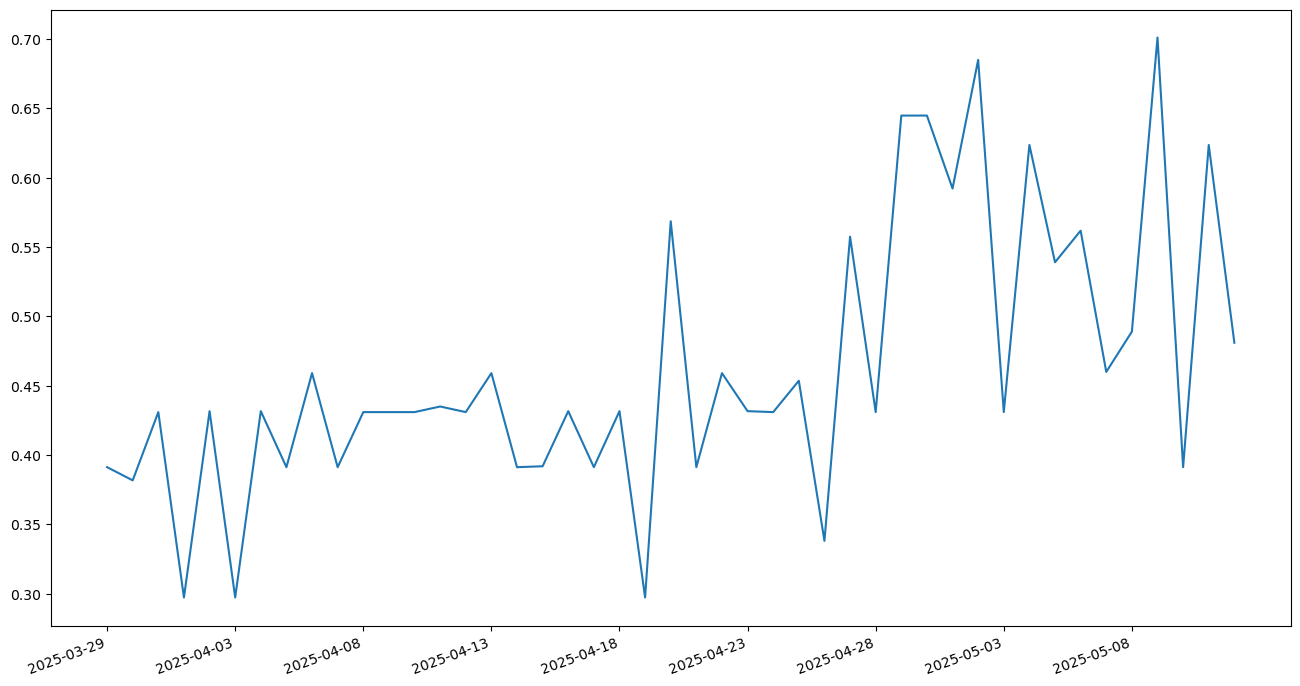

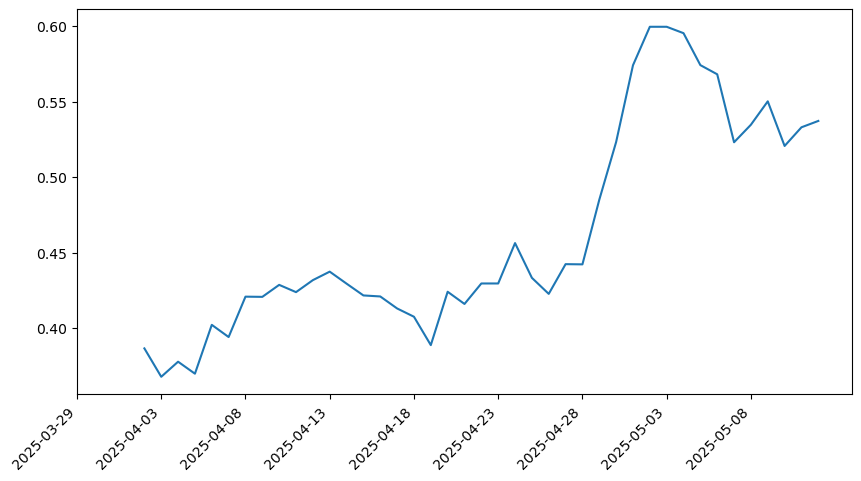

In [8]:
# plot the probabilities over time
import matplotlib.pyplot as plt
# add a colour gradient to the plot based on the injury probabilities -red is high, blue is low

import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

# add a colour gradient to the background based on the x axis -red is high, blue is low, with adjustable transparency
cmap = cm.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=0, vmax=1)



plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['injury probabilities'])
# fix the date axis titles to use every 3rd date in the format mm/dd
# select the last 5 chars of the date string to get the mm/dd format
plt.xticks(df['Date'][::5], rotation=20, ha='right')
# plot the probabilities over time with a rolling mean
plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['injury probabilities'].rolling(window=5).mean())
plt.xticks(df['Date'][::5], rotation=45, ha='right')